### Cab Price Prediction - Data Processing 

In this notebook, we are understanding our data-set by applying various funcions. We are performing data manipulation and data cleaning using Pandas library. 

1. Reading the dataframe
2. Finding the shape of dataframe 
3. Cheking the datatype of each attributes
4. Changing the datatype of needed attribute
5. Cheking the null values 
6. Removing null values 
7. Finding the distance 

In [ ]:
#Importing Libraries
import pandas as pd

#Reading the data-set
data = pd.read_csv('C:/Users/palak/Downloads/train.csv')

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

X_keep, X_drop, y_keep, y_drop = train_test_split(data.iloc[:,2:9], data.iloc[:,1], test_size=0.999, random_state=42)

In [ ]:
#save off dataset
df = X_keep.join(y_keep)
df.to_csv('C:/Users/palak/Downloads/taxi_data.csv')

In [ ]:
#import dataset
df = pd.read_csv('C:/Users/palak/Downloads/taxi_data.csv')

In [ ]:
#Shape of data
df.shape

(55423, 8)

In [ ]:
#Dataframe basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423 entries, 0 to 55422
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55423 non-null  int64  
 1   pickup_datetime    55423 non-null  object 
 2   pickup_longitude   55423 non-null  float64
 3   pickup_latitude    55423 non-null  float64
 4   dropoff_longitude  55420 non-null  float64
 5   dropoff_latitude   55420 non-null  float64
 6   passenger_count    55423 non-null  int64  
 7   fare_amount        55423 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
#Changing the datatype

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format= '%Y-%m-%d %H:%M:%S UTC')

In [ ]:
#Checking Null Values

df_num_missing = df.isnull().sum()
df_num_missing

Unnamed: 0           0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
fare_amount          0
dtype: int64

In [ ]:
#Finding the length of data-frame

len(df)

55423

In [ ]:
#Percentage of Missing Null Values

(df_num_missing/len(df))*100

Unnamed: 0           0.000000
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.005413
dropoff_latitude     0.005413
passenger_count      0.000000
fare_amount          0.000000
dtype: float64

### Explanation about dropping the null values

In this data frame the percentage of null values are less than 0.01%, which is very less in number. It will not affect the training of data model and predicting the price, if we will remove these null values. 


In [ ]:
#Dropping the null values

df = df.dropna()

In [ ]:
#Describing the data

df.describe()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,5.542000e+04,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.00000
mean,2.778471e+07,-72.475101,39.952327,-72.470379,39.856761,1.674720,11.31502
std,1.600231e+07,10.595210,13.867061,10.991747,9.800319,1.305396,9.85050
min,6.170000e+02,-207.952550,-74.013105,-736.383332,-1723.679763,0.000000,-6.90000
25%,1.391725e+07,-73.992169,40.734681,-73.991426,40.733834,1.000000,6.00000
50%,2.781014e+07,-73.981821,40.752341,-73.980335,40.752975,1.000000,8.50000
75%,4.164539e+07,-73.967396,40.766837,-73.963831,40.768008,2.000000,12.50000
max,5.542367e+07,40.792912,2925.007435,40.799192,50.613070,6.000000,500.00000


#### Observation:  The description of data shows that the minimum fare amount value is in negative. As this does not seem to be possible in real world. We further check the number of negative values present in data-set. 

In [ ]:
#Finding the number of negative values

df_negative = df[df['fare_amount'] < 0]

len(df_negative)

5

In [ ]:
#Removing the negative fare amount values

df = df[df['fare_amount'] >= 0]

In [ ]:
df.describe()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,5.541500e+04,55415.000000,55415.000000,55415.000000,55415.000000,55415.000000,55415.000000
mean,2.778479e+07,-72.474965,39.952255,-72.470242,39.856680,1.674691,11.316402
std,1.600236e+07,10.595678,13.867684,10.992233,9.800757,1.305368,9.849858
min,6.170000e+02,-207.952550,-74.013105,-736.383332,-1723.679763,0.000000,0.000000
25%,1.391698e+07,-73.992167,40.734680,-73.991426,40.733833,1.000000,6.000000
50%,2.781031e+07,-73.981822,40.752341,-73.980335,40.752975,1.000000,8.500000
75%,4.164561e+07,-73.967391,40.766836,-73.963829,40.768009,2.000000,12.500000
max,5.542367e+07,40.792912,2925.007435,40.799192,50.613070,6.000000,500.000000


In [ ]:
df['fare_amount'].describe()

count    55415.000000
mean        11.316402
std          9.849858
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        500.000000
Name: fare_amount, dtype: float64

Text(0.5, 1.0, 'Distribution of fare_amount Variable')

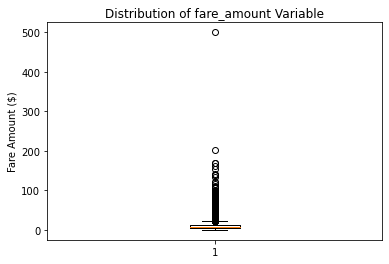

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df["fare_amount"])
plt.xlabel("")
plt.ylabel("Fare Amount ($)")
plt.title("Distribution of fare_amount Variable")

#### Observation:  From the above box plot, We can observe 1 outlier are present in data-set. As the number of outliers are less in qauntity, we can remove this to predict more accurate result. 

In [ ]:
#Removing the outliers
df = df[df['fare_amount'] < 300]

In [ ]:
df2 = df[df['dropoff_latitude'] <= 90]
df2 = df2[df2['dropoff_latitude'] >= -90]
df2 = df2[df2['pickup_latitude'] <= 90]
df2 = df2[df2['pickup_latitude'] >= -90]

df2 = df2[df2['dropoff_longitude'] >= -180]
df2 = df2[df2['dropoff_longitude'] <= 180]
df2 = df2[df2['pickup_longitude'] >= -180]
df2 = df2[df2['pickup_longitude'] <= 180]

len(df2)

55411

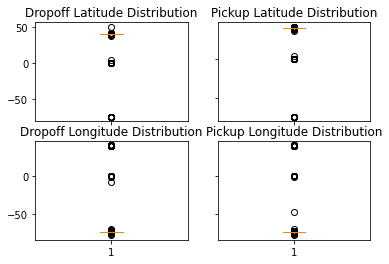

In [ ]:
# Create boxplots of Latitude/longitude
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df2["dropoff_latitude"])
axs[0, 0].set_title('Dropoff Latitude Distribution')
axs[1, 0].boxplot(df2["dropoff_longitude"])
axs[1, 0].set_title('Dropoff Longitude Distribution')
axs[0, 1].boxplot(df2["pickup_latitude"])
axs[0, 1].set_title('Pickup Latitude Distribution')
axs[1, 1].boxplot(df2["pickup_longitude"])
axs[1, 1].set_title('Pickup Longitude Distribution')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
df3 = df[df['dropoff_latitude'] <= 50]
df3 = df3[df3['dropoff_latitude'] >= 30]
df3 = df3[df3['pickup_latitude'] <= 50]
df3 = df3[df3['pickup_latitude'] >= 30]

df3 = df3[df3['dropoff_longitude'] >= -85]
df3 = df3[df3['dropoff_longitude'] <= -65]
df3 = df3[df3['pickup_longitude'] >= -85]
df3 = df3[df3['pickup_longitude'] <= -65]

df2 = df3
df = df2
len(df3)

54243

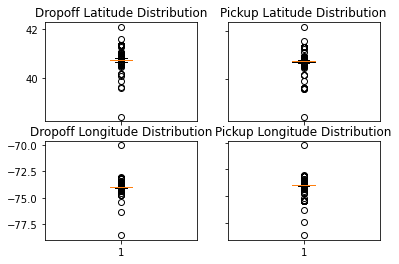

In [ ]:
# Create boxplots of Latitude/longitude
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df2["dropoff_latitude"])
axs[0, 0].set_title('Dropoff Latitude Distribution')
axs[1, 0].boxplot(df2["dropoff_longitude"])
axs[1, 0].set_title('Dropoff Longitude Distribution')
axs[0, 1].boxplot(df2["pickup_latitude"])
axs[0, 1].set_title('Pickup Latitude Distribution')
axs[1, 1].boxplot(df2["pickup_longitude"])
axs[1, 1].set_title('Pickup Longitude Distribution')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
df['passenger_count'].describe()

count    54243.000000
mean         1.676050
std          1.306991
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

#### Observation: The maximum number of passenger count is 208, which is not possible in real world. There are maximum 6 numbers of passengers can sit in one taxi. 

In [ ]:
#Removing the outliers
df = df[df["passenger_count"] < 7]

In [ ]:
import numpy as np

#radius of earth in kilometers
R = 6373.0

pickup_lat  = np.radians(df["pickup_latitude"])
pickup_lon  = np.radians(df["pickup_longitude"])
dropoff_lat = np.radians(df["dropoff_latitude"])
dropoff_lon = np.radians(df["dropoff_longitude"])

dist_lon = dropoff_lon - pickup_lon
dist_lat = dropoff_lat - pickup_lat

#Formula
a = (np.sin(dist_lat/2))**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * (np.sin(dist_lon/2))**2 
c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) ) 
d = R * c #(where R is the radius of the Earth)

df["distance_mi"] = d/0.621371

Text(0.5, 1.0, 'Distribution of Distance (miles)')

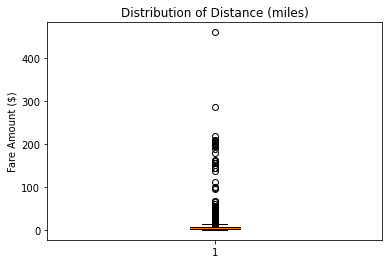

In [ ]:
#plt.scatter(df['distance_km'], df['fare_amount'])
plt.xlabel("")
plt.ylabel("Fare Amount ($)")

plt.boxplot(df["distance_mi"])
plt.title("Distribution of Distance (miles)")

In [ ]:
df.shape

(54243, 9)

In [ ]:
df.to_csv('C:/Users/palak/Downloads/taxi_data_clean.csv')

In [ ]:
df_clean = pd.read_csv('C:/Users/palak/Downloads/taxi_data_clean.csv')

### Data Visualization 

In [ ]:
#import geopandas
#import geoplot
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

data = [[-74.25, 40.5],[-74.05,40.6]]
staten_island = pd.DataFrame(data = data, columns = ['Lat', "Long"])
print(staten_island)

In [ ]:


boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

fig,ax=plt.subplots(figsize=(10,10))
boroughs.plot(ax=ax)#,alpha=0.4,color="grey")
plt.legend()
plt.grid(which='major')
plt.grid(which='minor')

plt.plot(staten_df['Long'],staten_df['Lat'], 'r' )
plt.plot(brooklyn_df['Long'],brooklyn_df['Lat'], 'k' )
plt.plot(manhatten_df['Long'],manhatten_df['Lat'], 'b' )
plt.plot(bronx_df['Long'],bronx_df['Lat'], 'c' )
plt.plot(queens_df['Long'],queens_df['Lat'], 'g' )



NameError: name 'geopandas' is not defined

Text(0.5, 1.0, 'Histogram of Fare Amount')

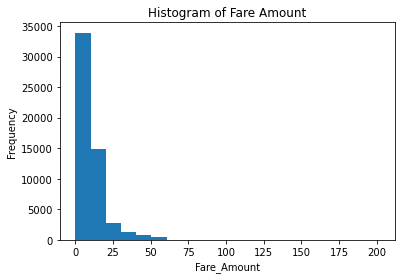

In [ ]:
n = plt.hist(df_clean['fare_amount'], 20)
plt.xlabel("Fare_Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Fare Amount")

Text(0.5, 1.0, 'Histogram of passenger count')

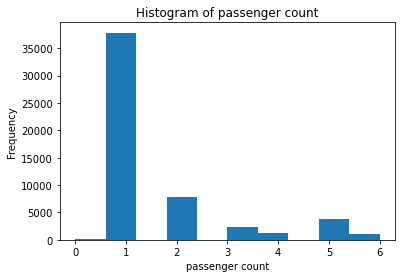

In [ ]:
n = plt.hist(df_clean['passenger_count'], 10)
plt.xlabel("passenger count")
plt.ylabel("Frequency")
plt.title("Histogram of passenger count")

Text(0.5, 1.0, 'Scatter plot of Fare Amount vs passenger_count')

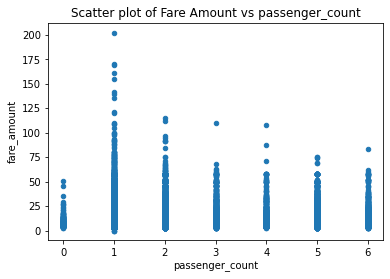

In [ ]:
df_clean.plot.scatter(x = 'passenger_count', y = 'fare_amount')
plt.title("Scatter plot of Fare Amount vs passenger_count")

Text(0.5, 1.0, 'Scatter plot of Fare Amount vs Distance')

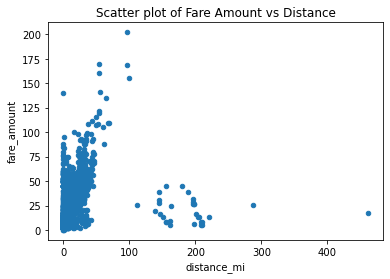

In [ ]:
df_clean.plot.scatter(x = 'distance_mi', y = 'fare_amount')
plt.title("Scatter plot of Fare Amount vs Distance")

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
queens_points = [(-73.876,40.577),(-73.859,40.65), (-73.96,40.743),(-73.936,40.778),(-73.9,40.8), (-73.76, 40.805),
                 (-73.69,40.75),(-73.71,40.59),(-73.95,40.54),(-73.95,40.567),(-73.876,40.577)]
queens_df = pd.DataFrame(data = queens_points, columns = ['Long', "Lat"])
queens_poly = Polygon(queens_points)

In [ ]:
bronx_points = [(-73.93,40.88),(-73.907,40.871),(-73.935,40.833),(-73.928, 40.8),(-73.936,40.778),(-73.9,40.8),
                (-73.76, 40.805),(-73.76, 40.91),(-73.913, 40.918),(-73.93,40.88)]
bronx_df = pd.DataFrame(data = bronx_points, columns = ['Long', "Lat"])
bronx_poly = Polygon(bronx_points)

In [ ]:
manhatten_points = [(-73.96,40.743),(-73.975,40.707),(-74.0,40.705),(-74.053,40.672),(-74.017,40.755),(-73.93,40.88),
                   (-73.907,40.871),(-73.935,40.833),(-73.928, 40.8),(-73.936,40.778),(-73.96,40.743)]
manhatten_df = pd.DataFrame(data = manhatten_points, columns = ['Long', "Lat"])
manhatten_poly = Polygon(manhatten_points)

In [ ]:
brooklyn_points = [(-74.04,40.56),(-73.876,40.577),(-73.859,40.65),(-73.96,40.743),(-73.975,40.707),(-74.0,40.705),
                  (-74.053,40.672),(-74.04,40.56)]
brooklyn_df = pd.DataFrame(data = brooklyn_points, columns = ['Long', "Lat"])
brooklyn_poly = Polygon(brooklyn_points)


In [ ]:
staten_points = [(-74.27, 40.49),(-74.15,40.52),(-74.05,40.6),(-74.07,40.65),(-74.2,40.642),(-74.25,40.55),
                 (-74.27, 40.49)]
staten_df = pd.DataFrame(data = staten_points, columns = ['Long', "Lat"])
staten_poly = Polygon(staten_points)

test = Point(-74.2, 40.55)
print(staten_poly.contains(test))

In [ ]:
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,distance_mi
0,0,53393071,2011-10-05 10:43:36,-73.992800,40.742900,-73.996900,40.747500,1,4.5,0.993590
1,1,33151006,2012-09-12 11:45:29,-73.972014,40.763332,-73.962586,40.775515,1,8.5,2.527796
2,2,37902622,2011-07-26 09:11:00,-73.981793,40.743592,-73.983923,40.753703,1,8.1,1.832846
3,3,47251205,2012-05-08 10:37:44,-73.972777,40.756115,-73.873318,40.774241,2,26.1,13.869388
4,4,1642249,2015-02-14 19:23:20,-73.968391,40.770561,-73.974434,40.762493,1,5.0,1.660408


In [ ]:
test = Point(df_clean['pickup_longitude'][1], df_clean['pickup_latitude'][1])
print(test)
manhatten_poly.contains(test)

POINT (-73.972014 40.763332)


True

In [ ]:
def find_borough(long, lat):
    point = Point(long, lat)
    if staten_poly.contains(point):
        borough = "staten"
        staten = 1
        brooklyn = 0 
        bronx = 0
        manhatten = 0
        queens = 0
        
    elif brooklyn_poly.contains(point):
        borough = "brooklyn"
        staten = 0
        brooklyn = 1
        bronx = 0
        manhatten = 0
        queens = 0
        
    elif bronx_poly.contains(point):
        borough = "bronx"
        staten = 0
        brooklyn = 0 
        bronx = 1
        manhatten = 0
        queens = 0
        
    elif manhatten_poly.contains(point):
        borough = "manhatten"
        staten = 0
        brooklyn = 0 
        bronx = 0
        manhatten = 1
        queens = 0
        
    elif queens_poly.contains(point):
        borough = "queens"
        staten = 0
        brooklyn = 0 
        bronx = 0
        manhatten = 0
        queens = 1
        
    else:
        borough = "none"
        staten = 0
        brooklyn = 0 
        bronx = 0
        manhatten = 0
        queens = 0
    
    borough_binary = [staten, brooklyn, bronx, manhatten, queens]
        
    return borough, borough_binary

In [ ]:
location = pd.DataFrame(0, index=np.arange(len(df_clean)),columns = ["pickup_loc", "dropoff_loc"])
for i in range(len(df_clean)):
    location["pickup_loc"][i], dump = find_borough(df_clean['pickup_longitude'][i], df_clean['pickup_latitude'][i])
    location["dropoff_loc"][i], dump = find_borough(df_clean['dropoff_longitude'][i], df_clean['dropoff_latitude'][i])

/var/folders/gx/7vzsnzkx02s_7fpll88vtyt00000gn/T/ipykernel_16702/99124511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["dropoff_loc"][i] = find_borough(df_clean['dropoff_longitude'][i], df_clean['dropoff_latitude'][i])


In [ ]:
pickup_dist = location["pickup_loc"].value_counts()
dropoff_dist = location["dropoff_loc"].value_counts()
print(dropoff_dist)
#plt.bar(location["pickup_loc"])

manhatten    48231
queens        2753
brooklyn      2712
bronx          292
none           238
staten          17
Name: dropoff_loc, dtype: int64


In [ ]:
dump, keep = find_borough(df_clean['pickup_longitude'][1], df_clean['pickup_latitude'][1])
print(keep)

[0, 0, 0, 1, 0]


In [ ]:
columns = ["pickup_staten", "pickup_brooklyn", "pickup_bronx", "pickup_manhatten", "pickup_queens",
           "dropoff_staten", "dropoff_brooklyn", "dropoff_bronx", "dropoff_manhatten", "dropoff_queens"]
location_binary = pd.DataFrame(0, index=np.arange(len(df_clean)),columns = columns)
for i in range(len(df_clean)):
    dump, location_binary.iloc[[i], [0,1,2,3,4]] = find_borough(df_clean['pickup_longitude'][i], df_clean['pickup_latitude'][i])
    dump, location_binary.iloc[[i], [5,6,7,8,9]] = find_borough(df_clean['pickup_longitude'][i], df_clean['pickup_latitude'][i])

In [ ]:
len(location_binary)

54243

In [ ]:
df_final1 = df_clean.join(location_binary)
df_final2 = df_final1[df_final1[columns].sum(axis=1) > 0]


In [ ]:
df_final2.head()
df_final = df_final2.drop(['Unnamed: 0.1','Unnamed: 0','pickup_longitude','pickup_latitude', 
               'dropoff_longitude', 'dropoff_latitude','pickup_staten','dropoff_staten'], axis = 1)
              

In [ ]:
df_final.to_csv('/Users/Jenna/Documents/grad school/IE 7275/project/taxi_data_final.csv')